# Part 1

0.199999002831
0.000159264598572


1.9999820650436639

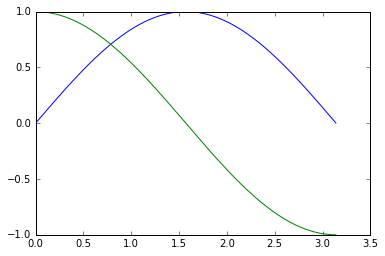

In [8]:
#The following statements are used to import numpy and matplotlib.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

plt.figure(1)
#Integrate for sine
x1= np.arange(0,np.pi, 0.01)
y1= np.sin(x1)
plt.plot(x1,y1)

#Integrate for cosine
x2= np.arange(0,np.pi, 0.01)
y2= np.cos(x2)
plt.plot(x2,y2)

def integrate(y, dx):
    return np.sum(y*dx)

print(integrate (y1, 0.001))

print(integrate (y2, 0.001))

#Integrate function in numpy
np.trapz(y1, x1)

#numpy function and my function produce very similar results

# Part 2

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

#max=1
#N=10
#x=np.linspace(-max, max, N)
#sigma=10
#y=np.exp(-(x)**2/2/sigma**2) * np.sin(x)


#plt.subplot(1, 2, 1)
#plt.plot(x,y)
#plt.title('Title Domain')
#plt.ylabel('$f(x)$')
 
#xf=np.fft.fftfreq(N,d=timestep)
#yf=np.fft.fft(y)


def x_range(lower, upper, y):
    s=(upper-lower)/y.size
    return np.arange(lower, upper, s)

def wavepacket(x, k, sigma):
    """This function creates a wavepacket on the interval defined by x with
    wavevector k and standard deviation sigma."""
    return np.sin(k*x) *  np.exp(-(x**2)/(2*sigma**2))


def main(lower,upper, k, sigma, noise_amplitude, cutoff):
    """This function should call noisy_packet() to get a Gaussian wave
    packet, call clean_data() to apply a low pass filter to the data and
    finally plot the result."""
    x=np.arange(lower, upper, 0.01)
    y=noisy_packet(x,k,sigma,noise_amplitude)
    
    plt.figure()
    plt.plot(x,y)
    plt.title("k="+str(k)+", STD="+str(sigma)+", noise-amp="+str(noise_amplitude))
    
    y_clean=clean_data(x,y,cutoff)
    plt.figure()
    x=x_range(lower, upper, y_clean)
    plt.plot(x,y_clean)
    plt.title("CLEANED: k="+str(k)+", STD="+str(sigma)+", noise-amp="+str(noise_amplitude))
    

def noisy_packet(x_values, k, sigma, noise_amplitude):
    """This function returns a noisy Gaussian wavepacket with wave
    vector k, standard deviation sigma and Gaussian noise of standard
    deviation noise_amplitude."""
    clean_y = wavepacket(x_values,k,sigma)
    noisy_y = clean_y + noise_amplitude*np.random.randn(len(x_values))
    return noisy_y

def clean_data(x_values,y_values, cutoff):
    """This function should take a set of y_values, perform the Fourier
    transform on it, filter out the high frequency noise, transform the
    signal back into real space, and return it."""
    
    fourier=np.fft.fft(np.array(y_values))
    n=len(fourier)
    d=0.1
    freqs=np.fft.fftfreq(n,d)
    for f in freqs:
            if(f>=cutoff):
                f=0
    y_clean=np.fft.irfft(freqs)
    return y_clean



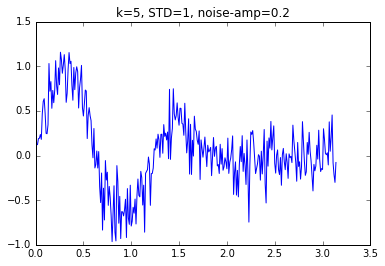

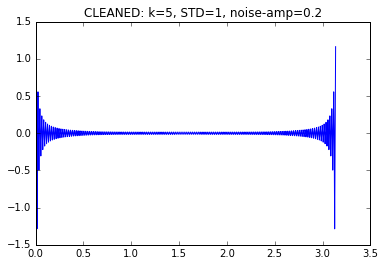

In [55]:

main(0, np.pi,5,1,.2,1)
#main(0, np.pi,.1,8,3,0)
#main(x,.4,2,.5)
#main(x,.9,1,1)